Najlepsze parametry SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Najlepsza CV Accuracy SVM: 0.53242972070708
Validation Accuracy (SVM): 0.527389903329753
Confusion Matrix:
[[150   2 177]
 [ 57   1 156]
 [ 48   0 340]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.46      0.51       329
           1       0.33      0.00      0.01       214
           2       0.51      0.88      0.64       388

    accuracy                           0.53       931
   macro avg       0.48      0.45      0.39       931
weighted avg       0.50      0.53      0.45       931



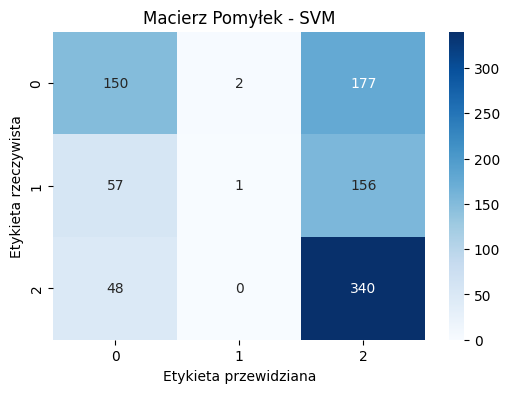

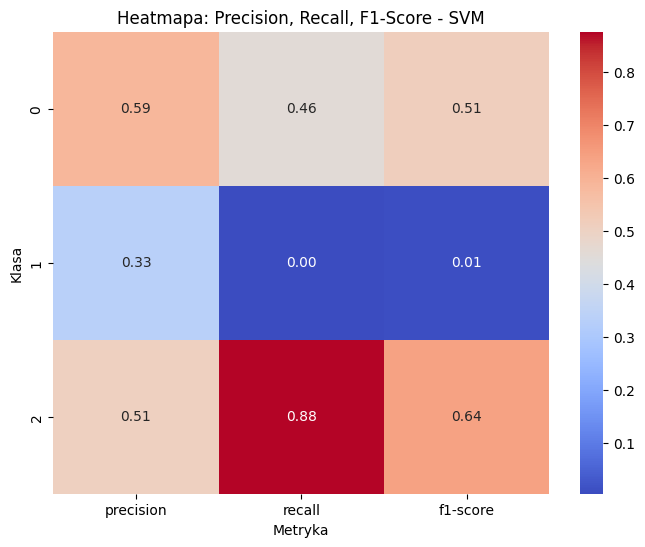

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wczytanie danych
train = pd.read_csv('Train.csv', parse_dates=['Date'])
val = pd.read_csv('Validation.csv', parse_dates=['Date'])

# 2. Przygotowanie cech i etykiety
# Używamy tylko danych dostępnych przed meczem
features = [
    'B365H', 'B365D', 'B365A', 
    'BWH', 'BWD', 'BWA',
    'HomeTeam_Form', 'AwayTeam_Form',
    'H2H_net',
    'Home_ELO', 'Away_ELO'
]
X_train = train[features]
y_train = train['FTR_encoded']

X_val = val[features]
y_val = val['FTR_encoded']

# 3. Preprocessing – skalowanie cech
# Skalowanie jest kluczowe przy użyciu SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Optymalizacja hiperparametrów dla SVM za pomocą GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Najlepsze parametry SVM:", grid.best_params_)
print("Najlepsza CV Accuracy SVM:", grid.best_score_)

# Wybieramy najlepszy model SVM
best_svm = grid.best_estimator_

# 5. Predykcja i ocena na zbiorze walidacyjnym
y_pred = best_svm.predict(X_val_scaled)
acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy (SVM):", acc)

# Obliczenie macierzy pomyłek oraz raportu klasyfikacji
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# 6. Wizualizacje
# 6.1. Heatmapa macierzy pomyłek
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz Pomyłek - SVM")
plt.ylabel("Etykieta rzeczywista")
plt.xlabel("Etykieta przewidziana")
plt.show()

# 6.2. Heatmapa precision, recall i f1-score
report_dict = classification_report(y_val, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Zakładamy, że klasy są oznaczone jako '0', '1' i '2'
df_metrics = df_report.loc[['0', '1', '2'], ['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_metrics, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmapa: Precision, Recall, F1-Score - SVM")
plt.ylabel("Klasa")
plt.xlabel("Metryka")
plt.show()
